<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----
Alumnos:
- Mauricio Caggia
- Francisco Furey
- Luciano Monforte
- Alejandro Pitton
----
# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [49]:
# Acá deberían leer el conjunto de datos que ya tienen.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
path= '/content/drive/My Drive/merged_sales_df.csv'
#path= '/content/drive/My Drive/DiploDatos/DD Grupo 13/2. EyCD/merged_sales_df.csv' # Este path sirve para correr en la compu de Lucho
df=pd.read_csv(path, encoding='latin-1', sep=",")

Mounted at /content/drive/


In [50]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115


In [51]:
df_aux=df

In [52]:
df_aux.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115


In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_aux['Type_encode']=labelencoder.fit_transform(df_aux['Type'])


In [54]:
df_aux

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean,Type_encode
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,9.572115,9.697115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,Wheelers Hill,4,h,1245000.0,16.7,3150.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0,3150.0,124.026455,189.0,9.443609,9.466165,0
13440,Williamstown,3,h,1031000.0,6.8,3016.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0,3016.0,191.094595,74.0,9.586957,9.717391,0
13441,Williamstown,3,h,1170000.0,6.8,3016.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0,3016.0,191.094595,74.0,9.586957,9.717391,0
13442,Williamstown,4,h,2500000.0,6.8,3016.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0,3016.0,191.094595,74.0,9.586957,9.717391,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suburb                       13444 non-null  object 
 1   Rooms                        13444 non-null  int64  
 2   Type                         13444 non-null  object 
 3   Price                        13444 non-null  float64
 4   Distance                     13444 non-null  float64
 5   Postcode                     13444 non-null  float64
 6   Bathroom                     13444 non-null  float64
 7   Car                          13382 non-null  float64
 8   Landsize                     13444 non-null  float64
 9   BuildingArea                 7040 non-null   float64
 10  YearBuilt                    8112 non-null   float64
 11  Regionname                   13444 non-null  object 
 12  Propertycount                13444 non-null  float64
 13  zipcode         

In [56]:
categorical_cols = ['Suburb','Type', 'Regionname']


In [57]:
numerical_cols = ['Rooms', 'Price', 'Distance', 'Postcode', 'Car','Bathroom', 'Landsize', 'Propertycount', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count', 'review_scores_value_mean', 'review_scores_location_mean']

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [58]:
# Creamos un data frame con las variables categóricas
cat_variables = df[['Type', 'Regionname']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()


,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


Mediante esta operación creamos un data frame con dos de las tres variables categóricas. Se elimina el campo original y se crean dos columnas de unos y ceros para “Type” y siete columnas para “Regionname”. No se efectuaron codificaciones en la variable "Suburb" por tener una elevada cardinalidad, (314 valores posibles, y las 313 columnas que habría que agregar, complicarían la resolución del ejercicio).

In [59]:
# Creamos un data frame con las variables numéricas
df = df.drop(['Suburb','Type', 'Regionname'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,4019.0,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,4019.0,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,4019.0,...,0,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,4019.0,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,4019.0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
df.shape

(13444, 25)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [61]:
# Re escalamos previamente las variables#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df2.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,NaN,NaN,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,NaN,NaN,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Estandarizamos  las variables#
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
df2_bis = pd.DataFrame(scaler2.fit_transform(df), columns = df.columns)
df2_bis.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,-0.975897,0.788652,-1.303696,-0.417856,-0.773776,-0.629963,-0.088249,NaN,NaN,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
1,-0.975897,-0.016685,-1.303696,-0.417856,-0.773776,-1.678752,-0.099720,-0.130479,-1.747885,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
2,0.078932,0.761506,-1.303696,-0.417856,0.712104,-1.678752,-0.105205,0.000039,-1.747885,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
3,0.078932,-0.351487,-1.303696,-0.417856,0.712104,-0.629963,-0.115180,NaN,NaN,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
4,1.133760,1.005821,-1.303696,-0.417856,-0.773776,0.418826,-0.108696,-0.014668,1.323379,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846


In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

In [64]:
'''
###Código anterior###

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df2.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(5))
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])
'''

"\n###Código anterior###\n\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.impute import IterativeImputer\n\nmelb_data_mice = df2.copy(deep=True)\n\nmice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(5))\nmelb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])\n"

#Prueba código de Jose

In [65]:
### Código nuevo ###
#Acá copio el df obtenido en el ejercicio anterior a un nuevo df
melb_data_mice = df2.copy(deep=True) # para el caso de re escalado de variables
melb_data_mice2 = df2_bis.copy(deep=True) # para el caso de estandarizado de variables

#Defino los parámetros del método
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor()) 
arr_df = mice_imputer.fit_transform(melb_data_mice) #Acá guardo el array que me devuelve el método de imputación. Se han imputado todos los NaN del dataframe. Revisar este punto porque es diferente al código sugerido en el ejercicio, pero de esta forma les va a dar una imputación más ajustada.
arr_df2 = mice_imputer.fit_transform(melb_data_mice2) #Para datos estandarizados

df_with_all = pd.DataFrame(arr_df, columns=melb_data_mice.columns) #Acá convierto a un data frame el array anterior y le pongo el nombre de las columnas del data frame con el que empecé esta sección
df_with_all2 = pd.DataFrame(arr_df2, columns=melb_data_mice2.columns) #Para datos estandarizados

df_with_all.head() #Acá simplemente miro que armé
df_with_all2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,-0.975897,0.788652,-1.303696,-0.417856,-0.773776,-0.629963,-0.088249,-0.106949,-1.586239,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
1,-0.975897,-0.016685,-1.303696,-0.417856,-0.773776,-1.678752,-0.099720,-0.130479,-1.747885,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
2,0.078932,0.761506,-1.303696,-0.417856,0.712104,-1.678752,-0.105205,0.000039,-1.747885,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
3,0.078932,-0.351487,-1.303696,-0.417856,0.712104,-0.629963,-0.115180,-0.047389,-0.874999,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846
4,1.133760,1.005821,-1.303696,-0.417856,-0.773776,0.418826,-0.108696,-0.014668,1.323379,-0.782913,...,-0.636273,-0.300434,-0.537793,-0.062912,1.569731,-0.055308,-0.185881,-0.718221,-0.529625,-0.048846


In [66]:
melb_data_mice.YearBuilt.describe()

count    8112.000000
mean        0.935375
std         0.045159
min         0.000000
25%         0.905109
50%         0.941606
75%         0.976886
max         1.000000
Name: YearBuilt, dtype: float64

In [67]:
# Para datos estandarizados#
melb_data_mice2.YearBuilt.describe()

count    8.112000e+03
mean     3.924102e-16
std      1.000062e+00
min     -2.071429e+01
25%     -6.702482e-01
50%      1.379792e-01
75%      9.192656e-01
max      1.431143e+00
Name: YearBuilt, dtype: float64

In [68]:
melb_data_mice.BuildingArea.describe()

count    7040.000000
mean        0.003369
std         0.012221
min         0.000000
25%         0.002067
50%         0.002808
75%         0.003841
max         1.000000
Name: BuildingArea, dtype: float64

In [69]:
# Para datos estandarizados
melb_data_mice2.BuildingArea.describe()

count    7.040000e+03
mean    -1.211152e-17
std      1.000071e+00
min     -2.757039e-01
25%     -1.065818e-01
50%     -4.591845e-02
75%      3.864258e-02
max      8.155548e+01
Name: BuildingArea, dtype: float64

In [70]:
melb_data_mice.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,NaN,NaN,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,NaN,NaN,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


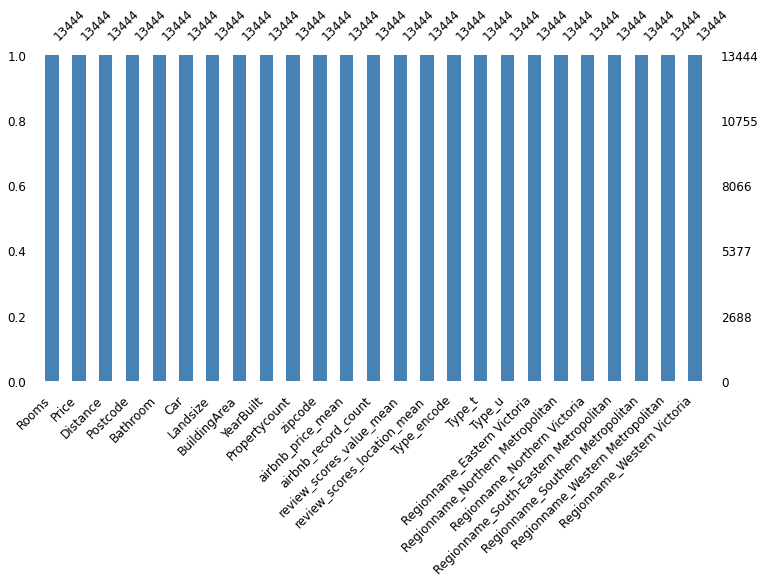

In [71]:
## Imputamos el valor más frecuente al resto de variables con missing

import missingno as msno
from sklearn.impute import SimpleImputer

# seteamos la estrategia 'most_frequent' 

mean_imputer = SimpleImputer(strategy='most_frequent') # la estrategia también podría ser 'mean' o 'median'

melb_data_mice.iloc[:,:] = mean_imputer.fit_transform(melb_data_mice)
msno.bar(melb_data_mice, figsize=(12, 6), fontsize=12, color='steelblue')

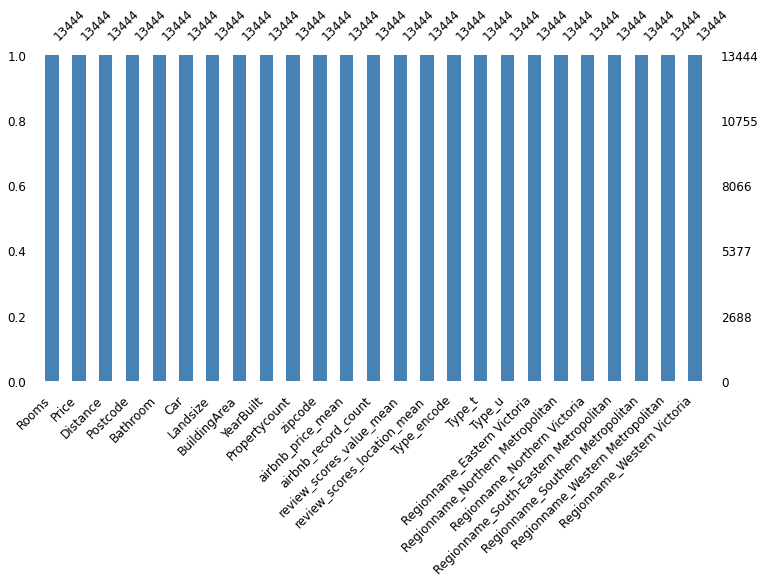

In [72]:
## Imputamos el valor más frecuente al resto de variables con missing
# Para el dataset con variables estandarizadas

import missingno as msno
from sklearn.impute import SimpleImputer

# seteamos la estrategia 'most_frequent' 

mean_imputer = SimpleImputer(strategy='most_frequent') # la estrategia también podría ser 'mean' o 'median'

melb_data_mice2.iloc[:,:] = mean_imputer.fit_transform(melb_data_mice2)
msno.bar(melb_data_mice2, figsize=(12, 6), fontsize=12, color='steelblue')

In [73]:
melb_data_mice.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,0.002696,0.941606,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,0.002696,0.941606,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.17616,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


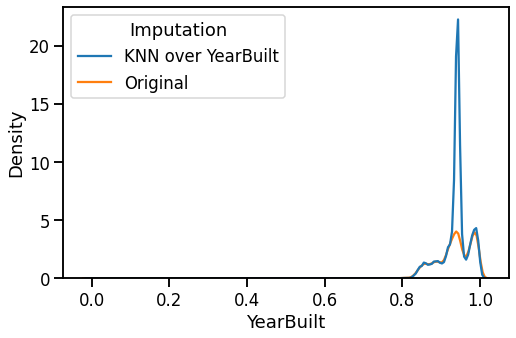

In [74]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt' # and BuildingArea
melb_year_build = df2.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
data.reset_index(inplace=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

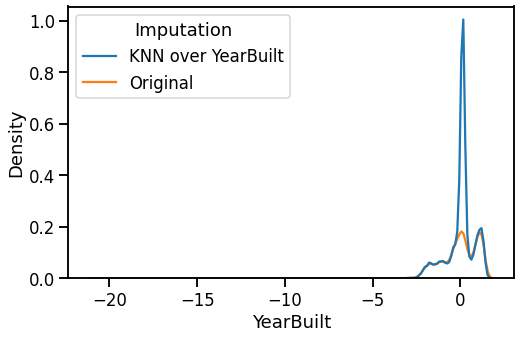

In [75]:
# Para datos con variables estadarizadas
mice_year_built2 = melb_data_mice2.YearBuilt.to_frame()
mice_year_built2['Imputation'] = 'KNN over YearBuilt' # and BuildingArea
melb_year_build2 = df2_bis.YearBuilt.dropna().to_frame()
melb_year_build2['Imputation'] = 'Original'
data2 = pd.concat([mice_year_built2, melb_year_build2])
data2.reset_index(inplace=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data2, x='YearBuilt', hue='Imputation')

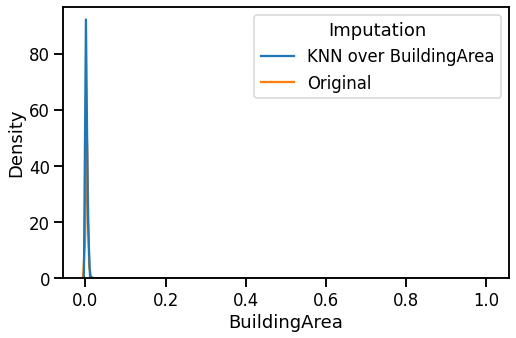

In [76]:
mice_building_area = melb_data_mice.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over BuildingArea'
melb_building_area = df2.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'
data = pd.concat([mice_building_area, melb_building_area])
data.reset_index(inplace=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='BuildingArea', hue='Imputation')

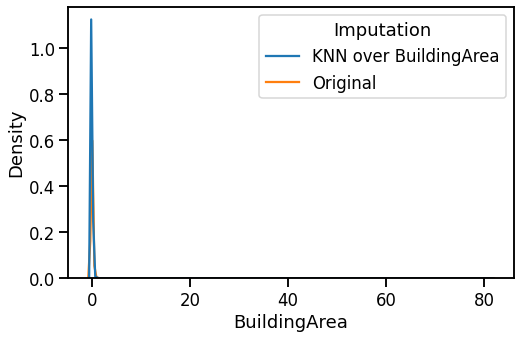

In [77]:
# Para datos estandarizados#
mice_building_area2 = melb_data_mice2.BuildingArea.to_frame()
mice_building_area2['Imputation'] = 'KNN over BuildingArea'
melb_building_area2 = df2_bis.BuildingArea.dropna().to_frame()
melb_building_area2['Imputation'] = 'Original'
data2 = pd.concat([mice_building_area2, melb_building_area2])
data2.reset_index(inplace=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data2, x='BuildingArea', hue='Imputation')

In [78]:
# Notar que no parece verse afectada la forma de la distribución de las variables con variables reescaladas como normalizadas,
# Pero hay que resaltar que normalizar variables con algunos valores muy extremos no es aconsejable, dado que básicamente la operación 
# de normalizar implica restar la media a cada observación y dividir por su desviación estándar y ambas medidas (media y ds) son sensibles a valores extremos
# Por lo que se considera más acertado aplicar el reescalado y no la normalización.

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [79]:
#VARIABLES QUE AUN TIENEN MISSING#
melb_data_mice.isna().any()[lambda x: x]

Series([], dtype: bool)

In [80]:
# Paso a array (para el ejercicio 4)
melb_data_mice2= melb_data_mice.to_numpy()

In [81]:
melb_data_mice2

array([[0.11111111, 0.42923077, 0.05197505, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.29230769, 0.05197505, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.42461538, 0.05197505, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22222222, 0.33384615, 0.14137214, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.74307692, 0.14137214, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.36923077, 0.13097713, ..., 0.        , 1.        ,
        0.        ]])

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [82]:
# Trabajamos con la matriz imputada y re escalada para aplicar PCA#
from sklearn.decomposition import PCA

#pca = PCA(n_components=3)
pca = PCA()
pca.fit(melb_data_mice)
#print("Principal components")
#print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)


Explained variance: 
[3.92717124e-01 2.99085483e-01 2.39310689e-01 8.58884211e-02
 6.35278536e-02 3.76151030e-02 2.27334932e-02 2.05371067e-02
 1.61884178e-02 1.37462544e-02 8.30936785e-03 6.43015086e-03
 5.84826826e-03 5.33586743e-03 3.84737211e-03 3.34199727e-03
 2.94800241e-03 2.81870505e-03 2.56880440e-03 1.87116558e-03
 9.17964944e-04 9.08217210e-05 7.55443436e-05 4.87386711e-05
 1.89949805e-31]
Explained variance ratio
[3.17783024e-01 2.42017175e-01 1.93647971e-01 6.95001070e-02
 5.14061450e-02 3.04377895e-02 1.83957301e-02 1.66184347e-02
 1.30995163e-02 1.11233405e-02 6.72386275e-03 5.20321794e-03
 4.73236398e-03 4.31773402e-03 3.11325752e-03 2.70431293e-03
 2.38549598e-03 2.28086976e-03 2.07865249e-03 1.51412969e-03
 7.42808648e-04 7.34920872e-05 6.11297763e-05 3.94388768e-05
 1.53705605e-31]


In [83]:
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var) +1)]

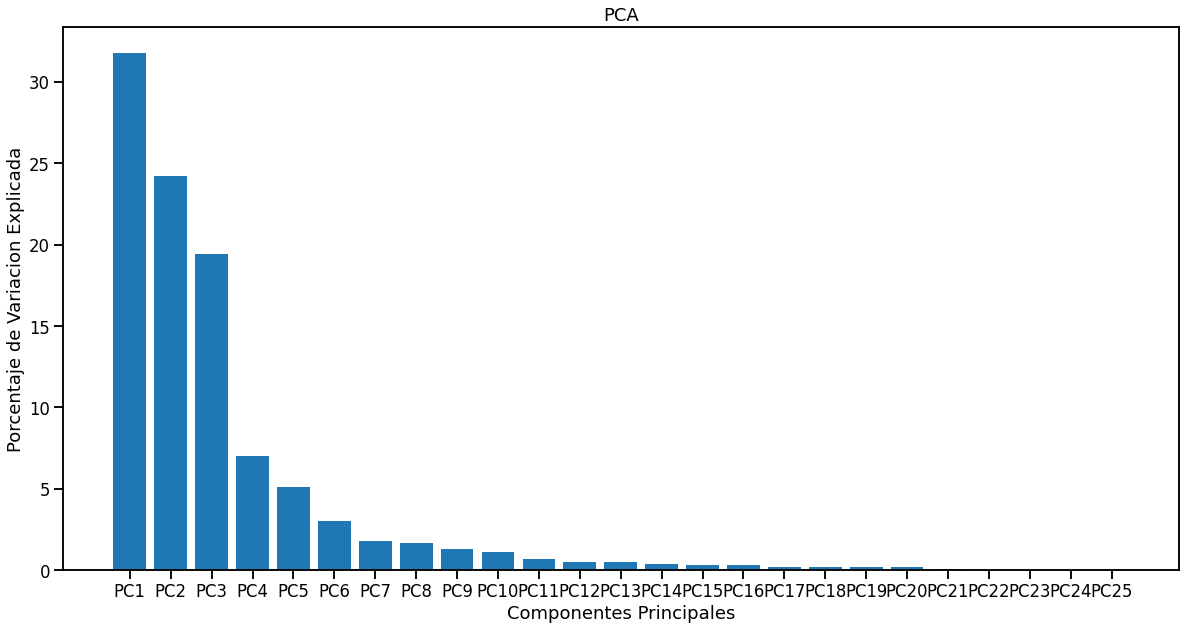

In [84]:
plt.figure(figsize=(20,10))
plt.bar(x=range(1,len(per_var) + 1), height=per_var,tick_label = labels)
plt.ylabel('Porcentaje de Variacion Explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')
plt.show()

In [85]:
melb_data_mice

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Type_encode,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.111111,0.429231,0.051975,0.068577,0.125,0.1,0.000466,0.002696,0.941606,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.292308,0.051975,0.068577,0.125,0.0,0.000360,0.001775,0.856448,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.424615,0.051975,0.068577,0.250,0.0,0.000309,0.003370,0.856448,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.235385,0.051975,0.068577,0.250,0.1,0.000217,0.002696,0.941606,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.466154,0.051975,0.068577,0.125,0.2,0.000277,0.003190,0.995134,0.176160,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,0.333333,0.356923,0.347193,0.153531,0.250,0.2,0.001506,0.002696,0.954988,0.333769,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13440,0.222222,0.291077,0.141372,0.016377,0.250,0.2,0.000769,0.002988,0.972019,0.286482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13441,0.222222,0.333846,0.141372,0.016377,0.250,0.4,0.001007,0.002696,0.974453,0.286482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13442,0.333333,0.743077,0.141372,0.016377,0.125,0.5,0.002000,0.003527,0.880779,0.286482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


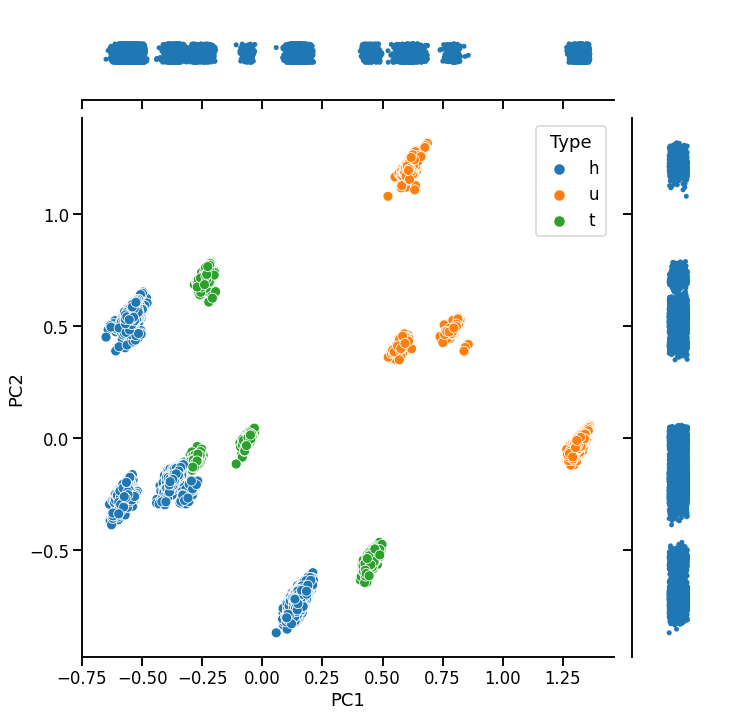

In [86]:
import seaborn
X_reduced = pca.transform(melb_data_mice)

g = seaborn.JointGrid(x=X_reduced[:,0], y=X_reduced[:,1],
                      hue= df_aux["Type"],
                      height=10)
g.set_axis_labels("PC1", "PC2")
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

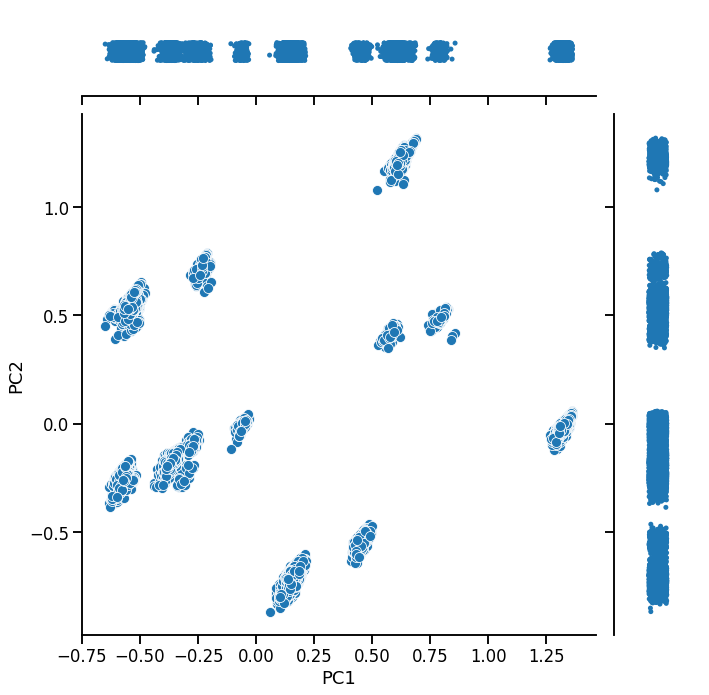

In [88]:
X_reduced2 = X_reduced
X_reduced2 = pd.DataFrame(X_reduced2)
X_reduced2
X_reduced2.rename(columns = {0 : 'PC1', 1 : 'PC2'}, inplace = True)
g = seaborn.JointGrid(data=X_reduced2, x="PC1", y="PC2", height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

In [89]:
# En tres dimensiones para mostrar los primeros tres componentes principales#
import plotly.express as px

total_var= pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_reduced, x= 0, y= 1, z= 2, color = df_aux['Type'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3', 'color':'Type'},
    )
fig.show()

In [ ]:
# Solo la tipología de construcción "u" parecería ser diferente#

In [90]:
# En tres dimensiones para mostrar los primeros tres componentes principales#
import plotly.express as px
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_reduced, x=0, y=1, z=2, color=df_aux['Regionname'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3', 'color':'Regionname'}
)
fig.show()

In [97]:
# Notar que la región Metropolitana Norte y la Oeste parecen ser diferentes del resto de regiones (dependiendo el componente con la que la observemos)

In [91]:
# Ahora agregamos al dataframe original los 3 componentes principales que más explican la varianza subyacente de los datos#
X_reduced_bis=pd.DataFrame(X_reduced)
X_reduced_bis
# Solo necesitamos las tres primeras columnas de la matriz de componentes principales#
tres_pca=X_reduced_bis.loc[:,[0,1,2]]
tres_pca.head()

,0,1,2
0,-0.527617,0.519589,-0.440603
1,-0.518359,0.544152,-0.422433
2,-0.535879,0.510267,-0.445866
3,-0.529839,0.537463,-0.420097
4,-0.549866,0.495611,-0.452301


In [92]:
tres_pca.rename(columns = {0:'PCA1', 1:'PCA2', 2:'PCA3'}, inplace = True)

In [93]:
tres_pca

,PCA1,PCA2,PCA3
0,-0.527617,0.519589,-0.440603
1,-0.518359,0.544152,-0.422433
2,-0.535879,0.510267,-0.445866
3,-0.529839,0.537463,-0.420097
4,-0.549866,0.495611,-0.452301
...,...,...,...
13439,-0.383242,-0.193311,-0.054489
13440,-0.558586,-0.251482,0.713491
13441,-0.567614,-0.265313,0.706364
13442,-0.597196,-0.336692,0.648435


In [94]:
frames = [melb_data_mice, tres_pca]
melb_data_mice_c_PCA= pd.concat(frames)

In [95]:
melb_data_mice_c_PCA.info()
## Tenemos toda la base con datos imputados  y las tres componentes principales más importantes#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26888 entries, 0 to 13443
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  13444 non-null  float64
 1   Price                                  13444 non-null  float64
 2   Distance                               13444 non-null  float64
 3   Postcode                               13444 non-null  float64
 4   Bathroom                               13444 non-null  float64
 5   Car                                    13444 non-null  float64
 6   Landsize                               13444 non-null  float64
 7   BuildingArea                           13444 non-null  float64
 8   YearBuilt                              13444 non-null  float64
 9   Propertycount                          13444 non-null  float64
 10  zipcode                                13444 non-null  float64
 11  ai

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [96]:
#EXPORTAMOS LA BASE RESULTANTE#
melb_data_mice.to_csv("Entregable2_escalado.csv", index=None)
from google.colab import files
files.download('Entregable2_escalado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
